# BA820-B15-Milestone 2
# Repetition or Structure? Exploring Color Consistency in Bob Ross Paintings
**Student:** Zixuan Zhu  

**Focus Question :** Do paintings with similar title themes exhibit similar pigment structures, or are titles largely independent of pigment composition?


This project began in Milestone 1, which involved investigating whether similar pigments are also used in similar paintings with a similar title theme. Initial exploratory analysis indicated that although some pigments are more common to certain themes, such tendencies were not as uniform and strong as to distinguish paintings by title alone.

The emphasis of the Milestone 2 basing on these finds is no longer on the treatment of title themes as the main form. This milestone first views the possibility that significant clusters of paintings can be made as a direct consequence of the act of pigment use itself, without making any title information. It is aimed at knowing whether or not latent, pigment-based clusters of style exist and then only at this point measure how well the title themes adjust to these data-driven groupings.

## 1. Data Preparation and Representation

In [1]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=r".*datetime\.datetime\.utcnow\(\) is deprecated.*",
    category=DeprecationWarning
)

In [2]:
import pandas as pd
file_path = '/content/bob_ross(1).csv'
df = pd.read_csv(file_path)

【Painting Counts by Theme】:
Categories
Other        138
Water         84
Mountain      57
Winter        56
Autumn        45
Structure     44
Forest        25
Oval          22
Name: count, dtype: int64
--------------------------------------------------
【Largest Pigment Differences: 'Other' vs 'Winter'】:
Sap_Green         0.615166
Cadmium_Yellow    0.545290
Indian_Yellow     0.507505
Yellow_Ochre      0.462215
Bright_Red        0.365166
dtype: float64
(Larger values indicate stronger differences in pigment usage.)


<Figure size 1400x700 with 0 Axes>

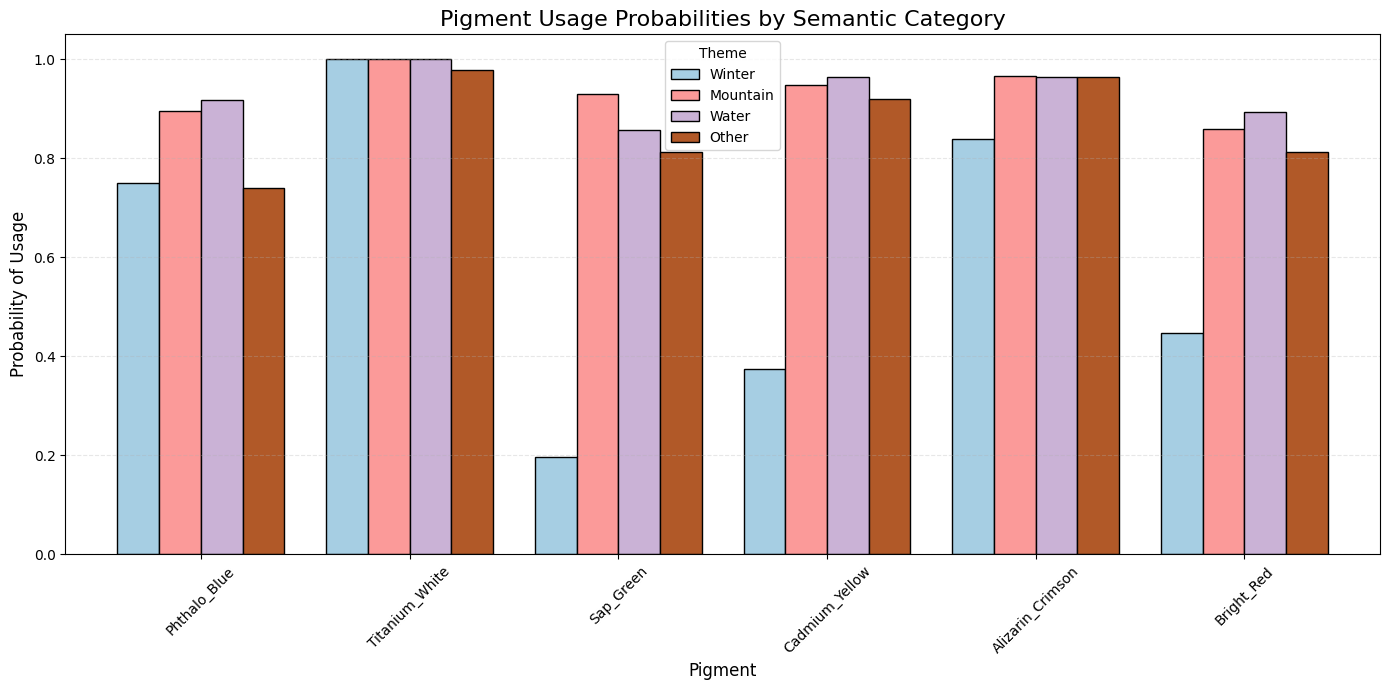

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('bob_ross(1).csv')


pigment_cols = df.iloc[:, 9:].columns.tolist()


categories_dict = {
    'Winter': ['winter', 'snow', 'ice', 'cold', 'frozen'],
    'Mountain': ['mountain', 'mt.', 'mount', 'peak', 'high'],
    'Water': ['lake', 'river', 'stream', 'creek', 'ocean', 'sea', 'waterfall', 'pond', 'beach', 'wave'],
    'Autumn': ['autumn', 'fall'],
    'Forest': ['forest', 'wood', 'tree', 'grove', 'walk'],
    'Structure': ['cabin', 'barn', 'mill', 'bridge', 'house', 'old'],
    'Oval': ['oval']
}

def classify_title(title):
    """
    Input a title string and return a list of all matched categories.
    If nothing matches, return ['Other'].
    """
    title_lower = str(title).lower()
    found_categories = []

    for cat, keywords in categories_dict.items():

        if any(k in title_lower for k in keywords):
            found_categories.append(cat)


    if not found_categories:
        return ['Other']
    return found_categories


df['Categories'] = df['painting_title'].apply(classify_title)


category_counts = df.explode('Categories')['Categories'].value_counts()

print("【Painting Counts by Theme】:")
print(category_counts)
print("-" * 50)


category_palette = {}

for cat in category_counts.index:
    mask = df['Categories'].apply(lambda x: cat in x)
    category_palette[cat] = df.loc[mask, pigment_cols].mean()

palette_df = pd.DataFrame(category_palette)


diff = (palette_df['Other'] - palette_df['Winter']).abs()
top_diffs = diff.sort_values(ascending=False).head(5)

print("【Largest Pigment Differences: 'Other' vs 'Winter'】:")
print(top_diffs)
print("(Larger values indicate stronger differences in pigment usage.)")

cols_to_plot = ['Winter', 'Mountain', 'Water', 'Other']
pigments_to_show = ['Phthalo_Blue', 'Titanium_White', 'Sap_Green', 'Cadmium_Yellow', 'Alizarin_Crimson', 'Bright_Red']

plt.figure(figsize=(14, 7))
palette_df.loc[pigments_to_show, cols_to_plot].plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    edgecolor='black',
    colormap='Paired'
)

plt.title("Pigment Usage Probabilities by Semantic Category", fontsize=16)
plt.ylabel("Probability of Usage", fontsize=12)
plt.xlabel("Pigment", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Theme")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Evidence 1: Substantial imbalance across semantic categories**

The semantic grouping process produces highly uneven category sizes.
As shown in the category counts above, the “Other” category contains 138 paintings,
while “Winter” contains only 56 paintings. Other themes such as “Water” (84) and
“Mountain” (57) also differ substantially in size.

This imbalance indicates that theme-level comparisons are not symmetric and that
“Winter vs Other” represents a contrast between a narrowly defined theme and a broad,
aggregated baseline rather than two equally coherent groups.


**Evidence 2: Pigment differences are concentrated in a small subset**

The ranked comparison of pigment usage probabilities between the “Winter” and “Other”
categories shows that the largest differences are concentrated in a small number of
pigments rather than distributed across the full palette.

Specifically, Sap Green shows an absolute usage difference of 0.62, followed by
Cadmium Yellow (0.55), Indian Yellow (0.51), and Yellow Ochre (0.46).
In contrast, most other pigments exhibit substantially smaller differences.

This concentration suggests that semantic title themes influence only a limited subset
of pigments instead of producing broad palette-wide separation.


**Evidence 3: Theme differences are driven by pigment absence rather than presence**

The category-level pigment usage plot shows that Winter paintings do not exhibit higher
usage of expected “winter” colors such as Phthalo Blue or Titanium White compared to
other themes. Instead, Winter paintings display markedly lower usage of green and yellow
pigments.

This pattern is consistent with the quantitative differences observed for Sap Green
(difference = 0.62) and Cadmium Yellow (difference = 0.55), indicating that the primary
source of separation is the systematic reduction of certain pigments rather than the
addition of theme-specific colors.


**Evidence 4: Dominant baseline pigments compress between-theme differences**

Across all semantic categories, Titanium White exhibits near-universal usage with
probabilities close to 1.0 regardless of title theme.
This pattern is visible in the category-level probability plot, where Titanium White
shows minimal variation across Winter, Water, Mountain, and Other.

The dominance of such baseline pigments reduces overall between-theme separability,
limiting the extent to which semantic titles can distinguish visual structure at the
palette level.


## 2.EDA & Preprocessing: Updates

**Reframed Focus Question :**

**Can paintings be grouped into interpretable pigment-based style clusters without using
title information, and how well do semantic title themes explain or align with these
emergent clusters?**


No additional preprocessing or feature transformation was applied beyond distance selection, as the analysis goal was exploratory rather than predictive.

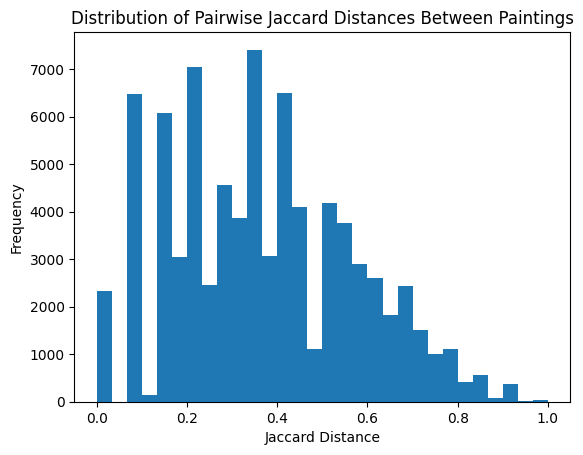

In [4]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

X_bin = df[pigment_cols].values
dist_matrix = pdist(X_bin, metric='jaccard')

plt.hist(dist_matrix, bins=30)
plt.title("Distribution of Pairwise Jaccard Distances Between Paintings")
plt.xlabel("Jaccard Distance")
plt.ylabel("Frequency")
plt.show()

The pairwise Jaccard distance distribution shows that paintings are neither almost
identical nor completely different in their pigment usage. Instead, most painting
pairs fall in a middle range of distances, indicating partial overlap in palettes.

This suggests that while many paintings share common pigments, there is still
meaningful variation across works. Importantly, the absence of a sharp separation
or clear peaks indicates that pigment usage does not naturally split into a small
number of obvious groups.

As a result, pigment usage appears to form a continuous style space rather than
predefined categories. This makes unsupervised clustering a reasonable next step
to explore whether latent style groupings emerge from the data without relying on
title information.

In [5]:
from scipy.stats import entropy

pigment_entropy = df[pigment_cols].apply(
    lambda x: entropy([x.mean(), 1 - x.mean()]), axis=0
).sort_values()

pigment_entropy

,0
Indian_Red,0.017364
Titanium_White,0.043895
Liquid_Black,0.150849
Alizarin_Crimson,0.218834
Van_Dyke_Brown,0.277312
Liquid_Clear,0.379777
Burnt_Umber,0.398515
Cadmium_Yellow,0.407567
Yellow_Ochre,0.484166
Phthalo_Blue,0.498332


This entropy analysis shows that not all pigments contribute equally to differentiating
paintings. Several pigments act as near-constant baseline components, while others vary
substantially across works.

This uneven information content supports the use of unsupervised methods, while also
motivating cautious interpretation of clustering results.


## 3.Analysis & Experiments

### 3.1 K-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[pigment_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

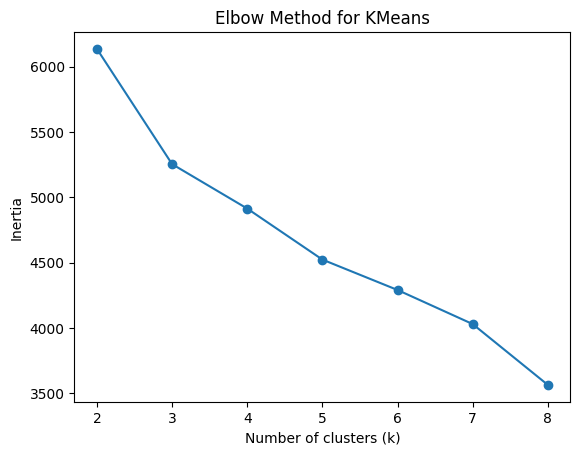

In [7]:
inertias = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

In [8]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels
df['cluster'].value_counts().sort_index()

,count
cluster,
0,70
1,262
2,71


In [75]:
cluster_profiles = (
    df
    .groupby('cluster')[pigment_cols]
    .mean()
)

cluster_profiles

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster,,,,,,,,,,,,,,,,,,
0,0.171429,0.857143,0.757143,0.971429,0.000000,0.000000,0.657143,0.028571,0.000000,0.014286,0.714286,0.685714,0.685714,0.928571,0.985714,1.000000,0.771429,1.000000
1,0.267176,0.935115,0.000000,0.980916,0.942748,0.003817,0.904580,0.034351,0.148855,0.992366,0.877863,0.221374,0.633588,0.870229,1.000000,0.946565,0.980916,0.980916
2,0.267606,0.225352,0.028169,0.295775,0.605634,0.000000,0.126761,0.042254,0.169014,0.788732,0.605634,0.140845,0.690141,0.183099,0.971831,0.746479,0.225352,0.746479


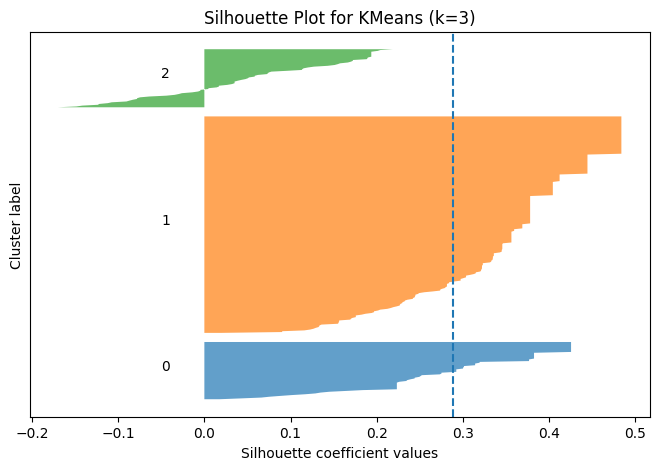

Average silhouette score: 0.289


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

labels = df['cluster'].values
X_use = X_scaled

sil_avg = silhouette_score(X_use, labels)
sil_vals = silhouette_samples(X_use, labels)

fig, ax = plt.subplots(figsize=(8, 5))

y_lower = 10
for c in np.sort(np.unique(labels)):
    c_sil_vals = sil_vals[labels == c]
    c_sil_vals.sort()

    size_c = c_sil_vals.shape[0]
    y_upper = y_lower + size_c

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, c_sil_vals,
                     alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_c, str(c))
    y_lower = y_upper + 10

ax.axvline(x=sil_avg, linestyle="--")
ax.set_title(f"Silhouette Plot for KMeans (k={len(np.unique(labels))})")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_yticks([])
plt.show()

print("Average silhouette score:", round(sil_avg, 3))

In [9]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels
df['cluster'].value_counts().sort_index()

,count
cluster,
0,14
1,253
2,68
3,68


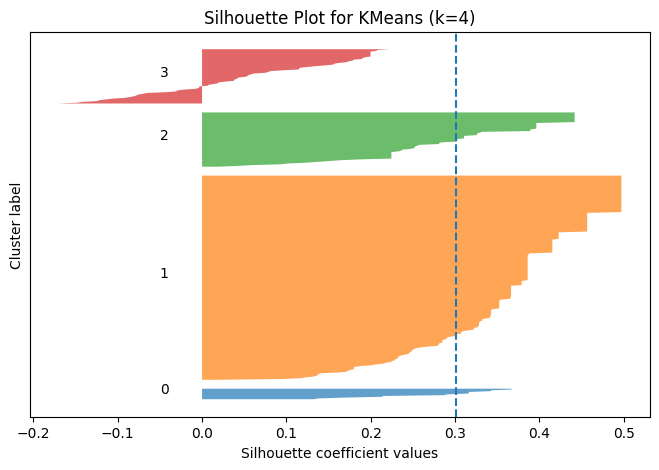

Average silhouette score: 0.301


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

labels = df['cluster'].values
X_use = X_scaled

sil_avg = silhouette_score(X_use, labels)
sil_vals = silhouette_samples(X_use, labels)

fig, ax = plt.subplots(figsize=(8, 5))

y_lower = 10
for c in np.sort(np.unique(labels)):
    c_sil_vals = sil_vals[labels == c]
    c_sil_vals.sort()

    size_c = c_sil_vals.shape[0]
    y_upper = y_lower + size_c

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, c_sil_vals,
                     alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_c, str(c))
    y_lower = y_upper + 10

ax.axvline(x=sil_avg, linestyle="--")
ax.set_title(f"Silhouette Plot for KMeans (k={len(np.unique(labels))})")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_yticks([])
plt.show()

print("Average silhouette score:", round(sil_avg, 3))

I applied the k-means clustering algorithm with k=3/4 to the standardized pigment usage data to explore whether paintings would naturally form a few distinct pigment-based styles without using title information. The resulting average silhouette coefficient was approximately 0.29/0.30, indicating a moderate but not significant degree of cluster separation.

Observation of the silhouette plot revealed that while some paintings were reasonably assigned to their respective clusters, many samples had silhouette values ​​close to zero. This indicates significant overlap between clusters and suggests that the boundaries between pigment-based groups are not clearly defined. In other words, these clusters reflect gradual differences in pigment usage rather than distinctly different styles.

These results suggest that pigment composition varies continuously in paintings rather than forming a few clearly defined categories. Therefore, although k=3 provides a reasonable and concise exploratory grouping, the clustering results did not reveal a strong inherent structure in the data. This directly supports our reformulated research question, indicating that pigment-based groupings exist only in an approximate pattern and are unlikely to correspond perfectly to semantic title themes.

### 3.2 Hierarchical Clustering

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

X_bin = df[pigment_cols].values

dist_matrix = pdist(X_bin, metric='jaccard')

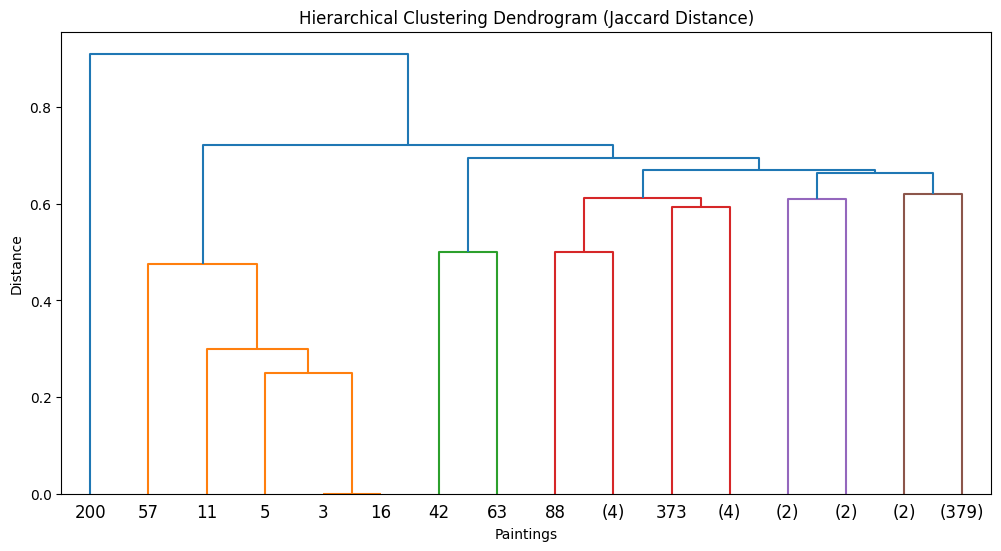

In [12]:
Z = linkage(dist_matrix, method='average')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Jaccard Distance)")
plt.xlabel("Paintings")
plt.ylabel("Distance")
plt.show()

Jaccard distance was used as the hierarchical clustering method to further test the hypothesis that pigment usage has a natural grouping pattern and does not require specification of the number of clusters. This is in contrast to KMeans where a successive merge of the data is revealed by the data itself.

The dendrogram indicates that the paintings are amalgamated at a very broad span of distances, and there is no distinct tallness at which the data naturally divides into a small quantity of prevailing clusters. Large merges are only made at fairly large Jaccard distances meaning that a large number of paintings are meaningfully distinct until late in the clustering process. Most notably, it has no clear-cut threshold, which would render a small group of distinct pigment-based sheets.

This trend implies usage of pigments does not constitute stylistic categories but rather varies continuously through paintings. The hierarchical results support the KMeans results in that any fixed number of clusters is an artificial simplification and not an indication that there is strong underlying structure. Collectively, all these findings confirm the reformulated research question as suggesting that although an approximation of pigment-based groupings can be made, they do not arise naturally out of the data and thus are unlikely to conform to semantic title themes.

## 4. Findings & Interpretations

The findings of the clustering indicate that the use of pigments in Bob Ross paintings is not arranged in hard-cut groups. Rather, paintings are seen to change gradually with the frequency of usage of specific pigments.

Applying KMeans (k=3) the clusters are mostly different in relative pigment intensity and not in exclusive pigments mixtures. The similarity in the commonly used pigments, like the Titanium White, is a common denominator in all clusters, making them unable to separate strongly.

Mean silhouette score (~0.29) depicts the moderate level of clustering but not strong structure. It implies that although there is a certain level of internal grouping there is no natural division of pigment use into highly distinct styles.

Notably, semantic title themes identified above are not very much aligned with these pigment-based clusters. This advocates the concept of the painting titles being an explanation of what is being depicted or how it is being depicted, and not a trustworthy measure of the underlying structure of the pigments.

These results, on the whole, justify the reposited question by demonstrating that latent pigment-based structure is present, although only loosely related to title-based categories.

## 5.Next Steps

1.Though pigment-made clusters were identified, the relationship between them and semantic title themes has not been officially assessed. One step further would be to look at how categories of titles apportion within clusters with the aim of determining whether there could be any significant congruence.

2.There is no bias in the current analysis between pigments, although previous findings indicate that certain pigments exhibit a significantly higher amount of information than the others. The reduced set of informative pigments may be analyzed in future in order to determine whether it makes the structure clearer or more interpretable.

3.The results in this milestone suggest the use of pigments to differing degrees not in discrete groups. It implies that the work done in the future should pay less attention to finding strict clusters and more on a general understanding of partial overlap and gradual variation in pigment use in paintings.



